In [21]:
# Wichtige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# NLTK-Modelle herunterladen
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Load the data from csv
df = pd.read_csv('data/hack.csv')

print(df.shape)

(8000, 6)


In [23]:

df = df.dropna(subset=['humor_rating'])

In [24]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens


df['tokenized_text'] = df['text'].apply(word_tokenize)


df['standardized_text'] = df['text'].apply(preprocess_text)


df[['text', 'tokenized_text', 'standardized_text']].head()


text  \
0  TENNESSEE: We're the best state. Nobody even c...   
1  A man inserted an advertisement in the classif...   
2  How many men does it take to open a can of bee...   
3  Told my mom I hit 1200 Twitter followers. She ...   
4  Roses are dead. Love is fake. Weddings are bas...   

                                      tokenized_text  \
0  [TENNESSEE, :, We, 're, the, best, state, ., N...   
1  [A, man, inserted, an, advertisement, in, the,...   
2  [How, many, men, does, it, take, to, open, a, ...   
3  [Told, my, mom, I, hit, 1200, Twitter, followe...   
4  [Roses, are, dead, ., Love, is, fake, ., Weddi...   

                                   standardized_text  
0  [TENNESSEE, :, 're, best, state, ., Nobody, ev...  
1  [man, inserted, advertisement, classified, ``,...  
2  [many, men, take, open, beer, ?, None, ., open...  
3  [Told, mom, hit, 1200, Twitter, follower, ., p...  
4  [Roses, dead, ., Love, fake, ., Weddings, basi...

In [25]:

df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in ['.', ',', '!', '?']]))


df[['text', 'text_length', 'word_count', 'avg_word_length', 'punctuation_count']].head()


text  text_length  word_count  \
0  TENNESSEE: We're the best state. Nobody even c...          114          17   
1  A man inserted an advertisement in the classif...          189          32   
2  How many men does it take to open a can of bee...          112          26   
3  Told my mom I hit 1200 Twitter followers. She ...          139          26   
4  Roses are dead. Love is fake. Weddings are bas...           72          12   

   avg_word_length  punctuation_count  
0         5.764706                  5  
1         4.937500                  4  
2         3.346154                  3  
3         4.384615                  3  
4         5.083333                  3

In [26]:

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

def calculate_stopword_ratio(tokens):
    non_stopwords = remove_stopwords(tokens)
    return 1 - (len(non_stopwords) / len(tokens)) if len(tokens) > 0 else 0

df['stopword_ratio'] = df['tokenized_text'].apply(calculate_stopword_ratio)

df[['text', 'stopword_ratio']].head()


text  stopword_ratio
0  TENNESSEE: We're the best state. Nobody even c...        0.160000
1  A man inserted an advertisement in the classif...        0.317073
2  How many men does it take to open a can of bee...        0.551724
3  Told my mom I hit 1200 Twitter followers. She ...        0.366667
4  Roses are dead. Love is fake. Weddings are bas...        0.266667

In [27]:

def calculate_richness(tokens):
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

df['richness'] = df['standardized_text'].apply(calculate_richness)

df[['text', 'richness']].head()


text  richness
0  TENNESSEE: We're the best state. Nobody even c...  0.809524
1  A man inserted an advertisement in the classif...  0.857143
2  How many men does it take to open a can of bee...  0.846154
3  Told my mom I hit 1200 Twitter followers. She ...  0.947368
4  Roses are dead. Love is fake. Weddings are bas...  0.818182

In [28]:

def calculate_richness(tokens):
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

df['richness'] = df['standardized_text'].apply(calculate_richness)

df[['text', 'richness']].head()


text  richness
0  TENNESSEE: We're the best state. Nobody even c...  0.809524
1  A man inserted an advertisement in the classif...  0.857143
2  How many men does it take to open a can of bee...  0.846154
3  Told my mom I hit 1200 Twitter followers. She ...  0.947368
4  Roses are dead. Love is fake. Weddings are bas...  0.818182

In [29]:

def get_readability(text):
    return textstat.automated_readability_index(text)

def get_difficult_words(text):
    return textstat.difficult_words(text) / len(text.split())

df['readability'] = df['text'].apply(get_readability)
df['difficult_words'] = df['text'].apply(get_difficult_words)


df[['text', 'readability', 'difficult_words']].head()


text  readability  \
0  TENNESSEE: We're the best state. Nobody even c...          8.5   
1  A man inserted an advertisement in the classif...          7.2   
2  How many men does it take to open a can of bee...          0.8   
3  Told my mom I hit 1200 Twitter followers. She ...          5.7   
4  Roses are dead. Love is fake. Weddings are bas...          4.5   

   difficult_words  
0         0.117647  
1         0.250000  
2         0.000000  
3         0.230769  
4         0.333333

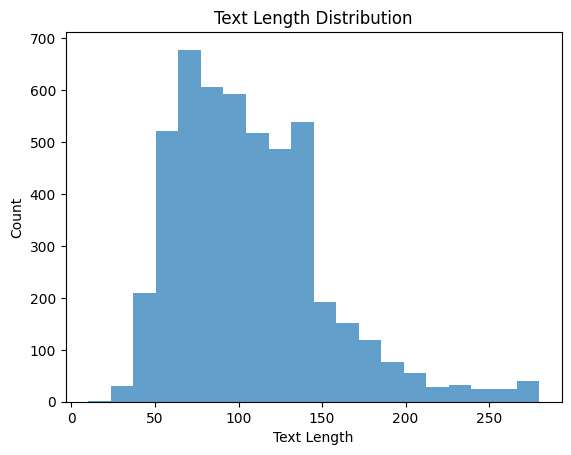

In [30]:

plt.hist(df['text_length'], bins=20, alpha=0.7)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


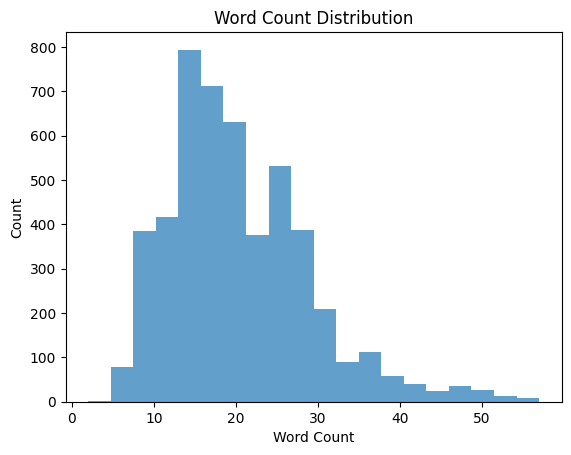

In [31]:

plt.hist(df['word_count'], bins=20, alpha=0.7)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()


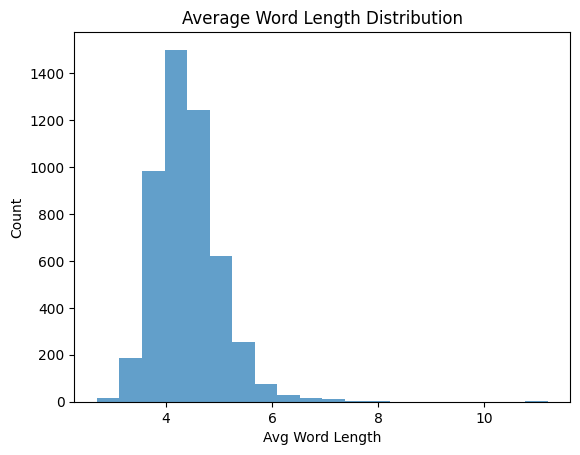

In [32]:

plt.hist(df['avg_word_length'], bins=20, alpha=0.7)
plt.title('Average Word Length Distribution')
plt.xlabel('Avg Word Length')
plt.ylabel('Count')
plt.show()


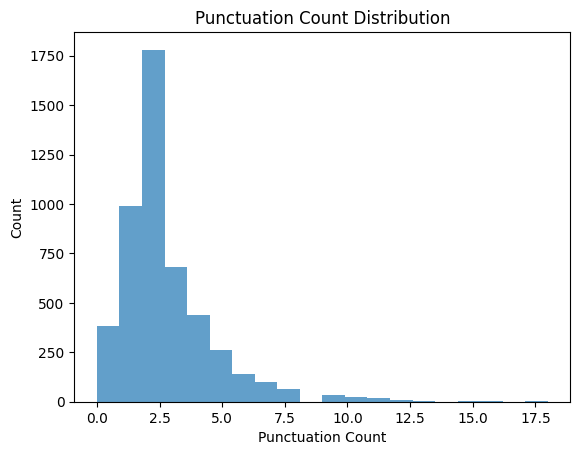

In [33]:

plt.hist(df['punctuation_count'], bins=20, alpha=0.7)
plt.title('Punctuation Count Distribution')
plt.xlabel('Punctuation Count')
plt.ylabel('Count')
plt.show()


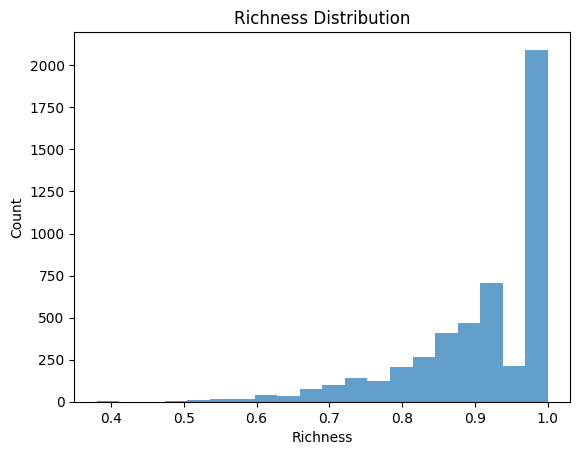

In [34]:

plt.hist(df['richness'], bins=20, alpha=0.7)
plt.title('Richness Distribution')
plt.xlabel('Richness')
plt.ylabel('Count')
plt.show()


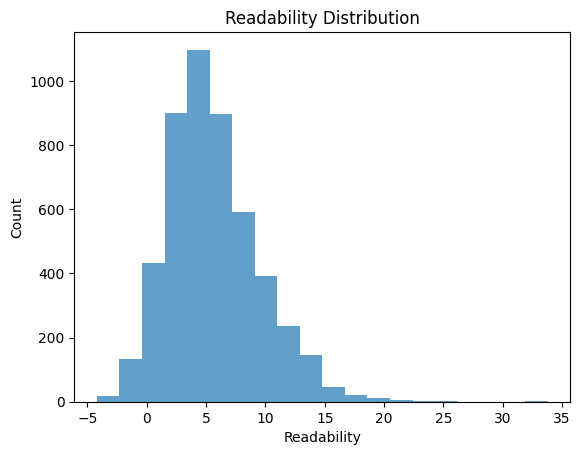

In [35]:

plt.hist(df['readability'], bins=20, alpha=0.7)
plt.title('Readability Distribution')
plt.xlabel('Readability')
plt.ylabel('Count')
plt.show()


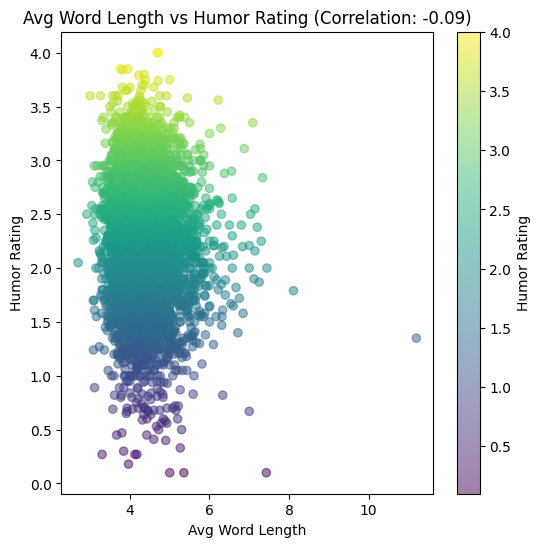

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


correlation = df['avg_word_length'].corr(df['humor_rating'])


plt.figure(figsize=(6, 6))

sc = plt.scatter(df['avg_word_length'], df['humor_rating'], alpha=0.5, c=df['humor_rating'], cmap='viridis')


plt.title(f'Avg Word Length vs Humor Rating (Correlation: {correlation:.2f})')
plt.xlabel('Avg Word Length')
plt.ylabel('Humor Rating')

plt.colorbar(sc, label='Humor Rating')


plt.show()


In [37]:

numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.corr()['humor_rating'])


id                   0.020462
is_humor                  NaN
humor_rating         1.000000
humor_controversy    0.173650
offense_rating      -0.308529
text_length          0.073611
word_count           0.093041
avg_word_length     -0.090018
punctuation_count    0.057945
stopword_ratio       0.105719
richness            -0.065616
readability         -0.060221
difficult_words     -0.099532
Name: humor_rating, dtype: float64
